# Descrição inicial do Projeto.

O atual projeto tem como intuíto a apresentação e análise dos dados fornecido pela cliente para ajudar a otimização das despezas com Marketing. 

O projeto terá como foco responder as seguintes questões da cliente:

1.	Produto
*	Quantas pessoas usam-no cada dia, semana e mês?
*	Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).
*	Que comprimento tem cada sessão?
*	Com que frequência os usuários voltam?


2.	Vendas
*	Quando as pessoas começam a comprar? (Na análise de KPIs, nós geralmente estamos interessados em saber o período de tempo entre o registro e a conversão - quando o usuário se torna um cliente. Por exemplo, se o registro e a primeira compra de um usuário ocorrem no mesmo dia, ele pode encaixar na categoria de Conversão 0d. Se a compra é realizada no dia seguinte, isso será a Conversão 1d. Você pode usar qualquer abordagem que permita comparar as conversões de diferentes coortes, para que você possa determinar qual coorte ou canal de marketing tem a maior eficiência)
*	Quantos pedidos os clientes fazem durante um determinado período de tempo?
*	Qual é o volume médio de uma compra?
*	Quanto dinheiro eles trazem para a empresa (LTV)?


3.	Marketing
*	Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo
*	Quanto custou a aquisição de clientes para cada origem?
*	Os investimentos valeram a pena? (ROI)


Tais respostas serão desenvolvidas no decorrer da análise. 

# 1. Importando Bibliotecas e os Dados

In [87]:
# Importanto Bibliotecas

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [88]:
# Importanto Data Sets

try:
     costs  = pd.read_csv('costs_us.csv')
     orders = pd.read_csv('orders_log_us.csv')
     visits = pd.read_csv('visits_log_us.csv')

except:
     costs  = pd.read_csv('/datasets/costs_us.csv')
     orders = pd.read_csv('/datasets/orders_log_us.csv')
     visits = pd.read_csv('/datasets/visits_log_us.csv')


## 1.1. Visualização preliminar

In [89]:
for i in [costs, orders, visits]:
    display(i.head(5))
    i.info()
    print()
    print('Linhas duplicadas:\n',i.duplicated().sum())
    print()
    print('Dados Ausentes:\n',i.isnull().sum())
    print()
    print('='*80)


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

Linhas duplicadas:
 0

Dados Ausentes:
 source_id    0
dt           0
costs        0
dtype: int64



,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

Linhas duplicadas:
 0

Dados Ausentes:
 Buy Ts     0
Revenue    0
Uid        0
dtype: int64



,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

Linhas duplicadas:
 0

Dados Ausentes:
 Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64



# 2. Tratando os Dados.


Não erros grosseiros que tomaram um espaço grande na análise, apenas alguns ajustes serão feitos.


> * Foi observado que há dados fora do tipo ideal, como por exemplo os dados referente as datas. Eles serão tratados e postos no formato adequado para a análise dos dados. 
> * Os nomes das colunas também serão alterados para um formato que facilite a análise, como por exemplo. serão transformados para letras minúsculas e em formato SnakeCase.

## 2.1. Corrigindo Erros

In [90]:
visits.Device.unique()

array(['touch', 'desktop'], dtype=object)

In [92]:
orders.columns = orders.columns.str.lower().str.replace(" ", '_')
costs.columns  = costs.columns.str.lower().str.replace(" ", '_')
visits.columns = visits.columns.str.lower().str.replace(" ", '_')


In [93]:
# Tratando divergências nos tipos de dados. 

orders['buy_ts']   = pd.to_datetime(orders['buy_ts'])
costs['dt']        = pd.to_datetime(costs['dt'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts']   = pd.to_datetime(visits['end_ts'])

In [94]:
for i in [costs, orders, visits]:
    i.info()
    print()
    print('='*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     ----------

Foram feitas as alterações necessárias nos dados, como os dados referentes a datas foram transformados para o formato correto, no caso, datetime. E as colunas passaram por um tratamento para que se adequem ao formato Python, que no caso é o SnakeCase, assim fica mais fácil e fluido lidar com o código no decorrer do projeto.

## 2.2 Adicionando novas informações. 

In [95]:
# Criando função para filtrar o mês para uma analise mensal

def get_month(x):
    return dt.datetime(x.year, x.month, 1)


In [96]:
#Dataset visits

visits['month_1st'] = visits['start_ts'].apply(get_month)
visits['year'] = visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.month
visits['week'] = visits['start_ts'].dt.week
visits['date'] = visits['start_ts'].dt.date
visits['duration_s'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

visits.head()



,device,end_ts,source_id,start_ts,uid,month_1st,year,month,week,date,duration_s
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017,12,52,2017-12-27,0


In [97]:
#Dataset orders
orders['month_1st'] = orders['buy_ts'].apply(get_month)
orders['buy_month'] = orders['buy_ts'].apply(get_month)
orders['buy_date'] = orders['buy_ts'].dt.date
orders['buy_year'] = orders['buy_ts'].dt.year
orders['buy_week'] = orders['buy_ts'].dt.week


orders.head()


,buy_ts,revenue,uid,month_1st,buy_month,buy_date,buy_year,buy_week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017,22
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017,22
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017,22
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017,22
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017,22


In [98]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.strftime('%Y-%m')
costs['month'] = pd.to_datetime(costs['month'])

costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


# 3. Análise dos Dados

>> Agora dará inicio ao estudo dos dados de forma mais profunda a fim de gerar um relatório a respeito do produto, da venda e da estratégia de Marketing executada pelo cliente. 

>>> * No subtópico 1 será análizado o produto onde será contabilizado os acessos tempo de sessão e a retenção dos clientes.
>>>Inicialmente será feita uma análise das métricas que descrevem a quantidade de usuários ativos, como por exemplo, **DAU**, **WAU** e **MAU**. 

> ## 3.1 Análise do Produto



### Produto
*	Quantas pessoas usam-no cada dia, semana e mês?
*	Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).
*	Que comprimento tem cada sessão?
*	Com que frequência os usuários voltam?


In [99]:
#DAU/WAU/MAU

dau = visits.groupby('date').agg({'uid': 'nunique'}).mean()
wau = visits.groupby('week').agg({'uid': 'nunique'}).mean()
mau = visits.groupby('month').agg({'uid': 'nunique'}).mean()


print('A média de usuários diários é de:', int(dau), 'usuários')
print('A média de usuários semanais é de:', int(wau), 'usuários')
print('A média de usuários mensais é de:', int(mau), 'usuários')

A média de usuários diários é de: 907 usuários
A média de usuários semanais é de: 5825 usuários
A média de usuários mensais é de: 23228 usuários


In [100]:
#Sessões por dia

session = visits.groupby('date').agg({'uid': 'count'}).mean()
total_session = (visits['duration_s']/60).mean()

print('A média de sessões diárias é de:', int(dau), 'sessões')
print('O tempo médio das sessões é de:', round(total_session), 'minutos.')

A média de sessões diárias é de: 907 sessões
O tempo médio das sessões é de: 11 minutos.


In [101]:
# Proporção de retenção

dau_wau = (dau/wau)*100
dau_mau = (dau/mau)*100
wau_mau = (wau/mau)*100

print('Proporção DAU/WAU:', "%.2f"% dau_wau,'%')
print('Proporção DAU/MAU:', "%.2f"% dau_mau,'%')
print('Proporção WAU/MAU:', "%.2f"% wau_mau,'%')

Proporção DAU/WAU: 15.59 %
Proporção DAU/MAU: 3.91 %
Proporção WAU/MAU: 25.08 %


As métricas de frequência de usuários nãos nos diz muita coisa se observadas isoladamente, por isso, também é feita a razão entre elas que tem o nome de Stickness Ratio. 

Como essas métricas dizem resepeito do envolvimento dos usuários com o site é importante termos essas métricas. 

Pode-se observar que temos uma razão de 15,59% de usuarios enganjados com o site na semana.
Uma proporcão de quase 4% de usuários diários compõem od níveis mensais, e 25% de enganjamento de usuários que retornam semanalmente. 


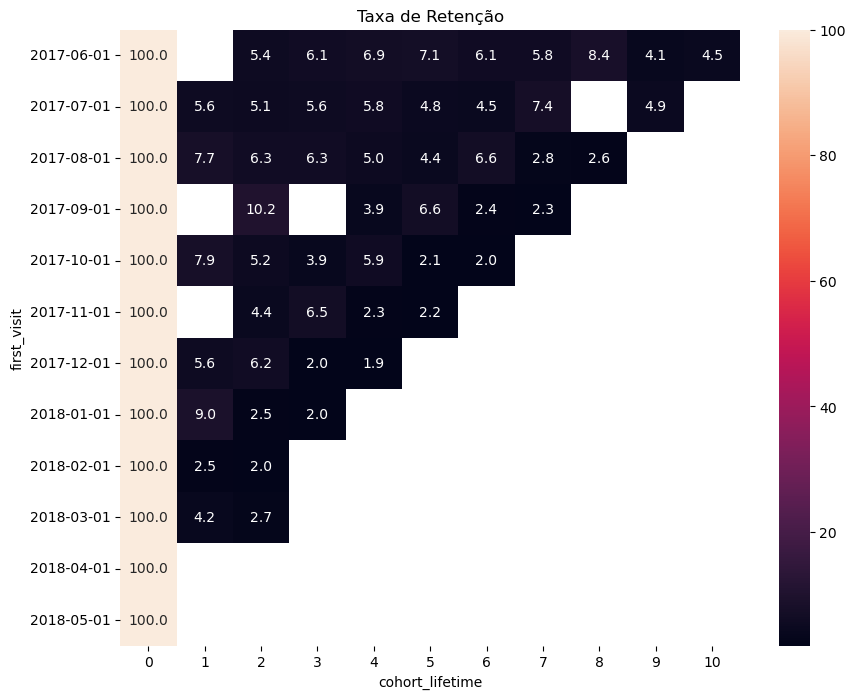

In [102]:
visits['date'] = pd.to_datetime(visits['date'])


first_visit = visits.groupby('uid')['date'].min()
first_visit.name = 'first_visit'
visits = visits.join(first_visit, on='uid')


visits['first_visit'] = visits['first_visit'].astype('datetime64[M]')
visits['date'] = visits['date'].astype('datetime64[M]')
visits['cohort_lifetime'] = (visits['date'] - visits['first_visit']) / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype('int')

cohort_visits = visits.groupby(['first_visit', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

initial_visits = cohort_visits[cohort_visits['cohort_lifetime'] == 0][['first_visit', 'uid']]
initial_visits = initial_visits.rename(columns={'uid': 'cohort_users'})

cohort_visits = cohort_visits.merge(initial_visits, on= 'first_visit')
cohort_visits['retention'] = (cohort_visits['uid'] / cohort_visits['cohort_users']) *100
cohort_visits['first_visit'] = cohort_visits['first_visit'].astype('str')

retention_pivot = cohort_visits.pivot_table(index = 'first_visit',
                                            columns='cohort_lifetime',
                                            values='retention',
                                            aggfunc='sum'
)

plt.figure(figsize=(10,8))
plt.title("Taxa de Retenção")

sns.heatmap(
    data = retention_pivot,
    annot=True,
    fmt='.1f',      
    linecolor='gray',
) 

plt.show()



Podemos observar alguns "buracos" na ertenção de usuários. E a retenção de usuários encontra-se abaixo de 10% o que é uma média muito baixa. O que não é interessante para o negócio.

## 3.2. Análise de Vendas

Será analisado: 


*	Quando as pessoas começam a comprar? (Na análise de KPIs, nós geralmente estamos interessados em saber o período de tempo entre o registro e a conversão - quando o usuário se torna um cliente. Por exemplo, se o registro e a primeira compra de um usuário ocorrem no mesmo dia, ele pode encaixar na categoria de Conversão 0d. Se a compra é realizada no dia seguinte, isso será a Conversão 1d. Você pode usar qualquer abordagem que permita comparar as conversões de diferentes coortes, para que você possa determinar qual coorte ou canal de marketing tem a maior eficiência)

*	Quantos pedidos os clientes fazem durante um determinado período de tempo?

*	Qual é o volume médio de uma compra?

*	Quanto dinheiro eles trazem para a empresa (LTV)?


In [103]:
#Criando coluna do período de tempo entre o registro(primeira sessão) e a compra. 

first_sale  = orders.groupby('uid')['buy_ts'].min()
first_visit = visits.groupby('uid')['start_ts'].min()
first_sale.name = 'first_sale'
first_visit.name = 'first_visit'
orders = orders.join(first_sale, on='uid')
orders = orders.join(first_visit, on='uid')
orders['visit_sale'] = ((orders['first_sale'] - orders['first_visit']).dt.seconds)/60

#Criação de colunas para a análise de cohots

orders['first_sale_month'] = orders['first_sale'].astype('datetime64[M]')
orders['sale_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['cohort_lifetime'] = (orders['sale_month'] - orders['first_sale_month']) / np.timedelta64(1, 'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype(int)
orders['first_sale_month'] = orders['first_sale_month'].dt.strftime('%Y-%m') 



print('O tempo médio de conversão do registro em compra é de:', round(orders['visit_sale'].mean()/ 60), 'horas')
print('A mediana do tempo de conversão do registro a compra é de:', round(orders['visit_sale'].median()), 'minutos')

O tempo médio de conversão do registro em compra é de: 5 horas
A mediana do tempo de conversão do registro a compra é de: 20 minutos


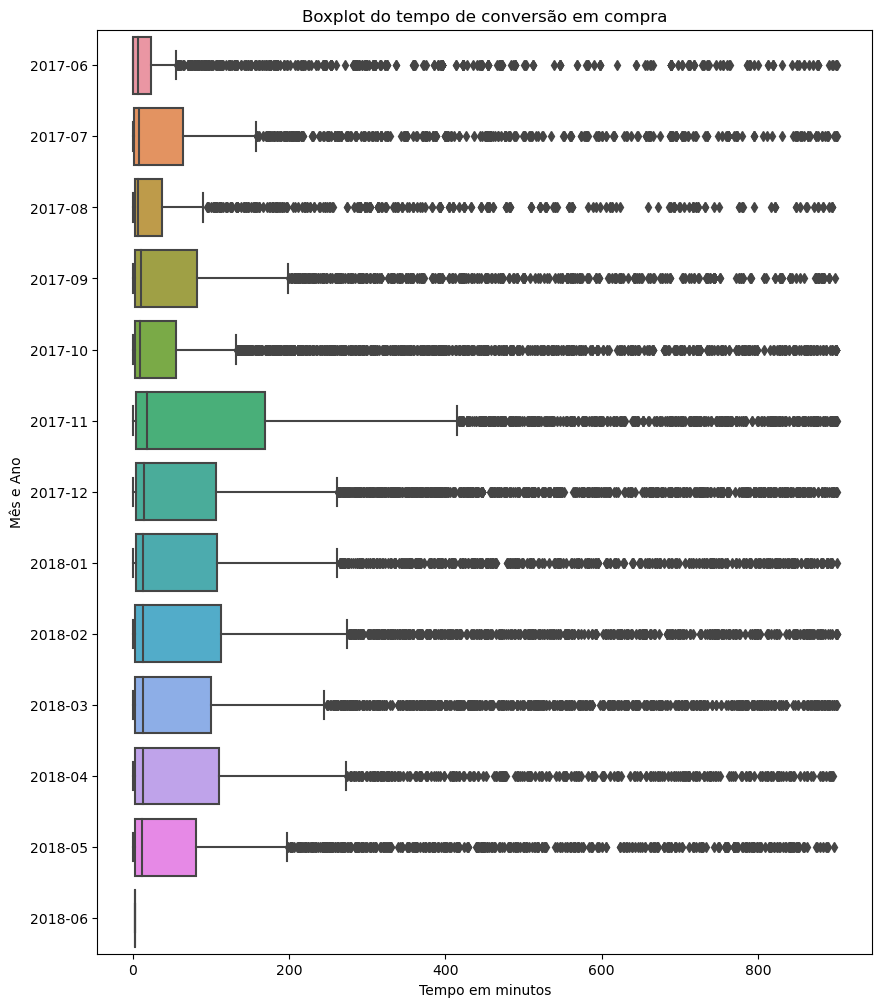

In [105]:
# Boxplot do tempo de conversão em compra. 

IQR_visit_sale = (np.quantile(orders['visit_sale'], .75) - np.quantile(orders['visit_sale'], .25))
low_fence   = np.quantile(orders['visit_sale'], .25) - (1.5*IQR_visit_sale)
upper_fence = np.quantile(orders['visit_sale'], .75) + (1.5*IQR_visit_sale)
orders['buy_month'] = orders.buy_month.astype('str')



plt.figure(figsize=(10, 12))
sns.boxplot(data= orders.query('@low_fence <= visit_sale <= @upper_fence'), x='visit_sale', y='first_sale_month', orient='h');
plt.title('Boxplot do tempo de conversão em compra')
plt.xlabel('Tempo em minutos')
plt.ylabel('Mês e Ano')
plt.show();


Observa-se que o tempo médio de conversão de login em compra em todos os meses são bem próximos um do outro. Mesmo retirando os valores outliers o tempo que cada usuário gasta na plataforma é único.

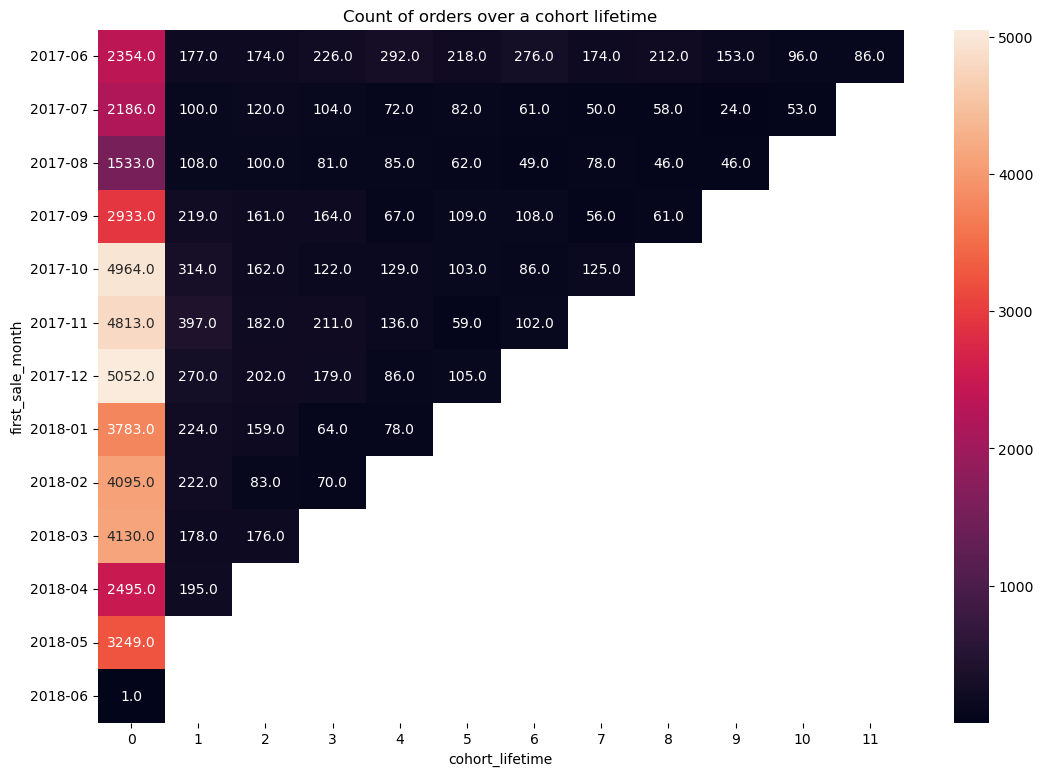

In [106]:
order_pivot = orders.pivot_table(
    index='first_sale_month',
    columns='cohort_lifetime',
    values='uid',
    aggfunc='count',
)

plt.figure(figsize=(13, 9))
plt.title('Count of orders over a cohort lifetime')
order_heatmap = sns.heatmap(
    order_pivot,
    annot=True,
    fmt='.1f'
    
) 


Percebe-se que a retenção de clientes é algo a ser trabalhado. Os níveis de retenção se encontram-se em média abaixo dos 10%. Valor esse que pode ser preocupante a depender das despesas de aquisição de novos clientes.

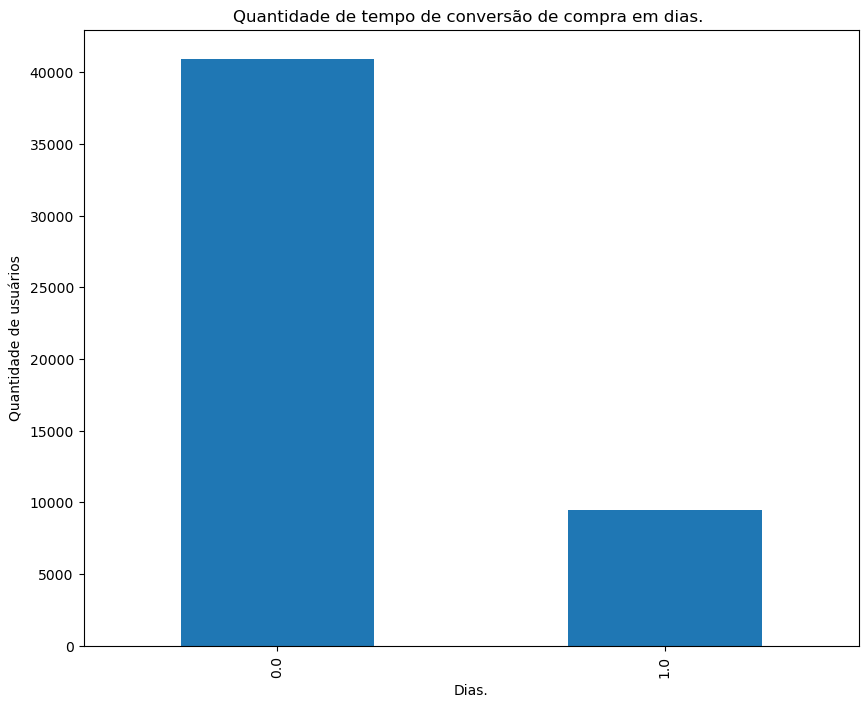

In [107]:
#Conversão de login e compra.


orders['conversion']= round((orders['visit_sale'] / 60) / 24)

plt.figure(figsize=(10,8))
plt.title('Quantidade de tempo de conversão de compra em dias. ')
orders.groupby('conversion')['conversion'].count().plot(kind='bar');
plt.xlabel('Dias.')
plt.ylabel('Quantidade de usuários')
plt.show();

Bem, as os clientes em sua grande maioria não esperam mais de 24h para finalizarem suas compras. 

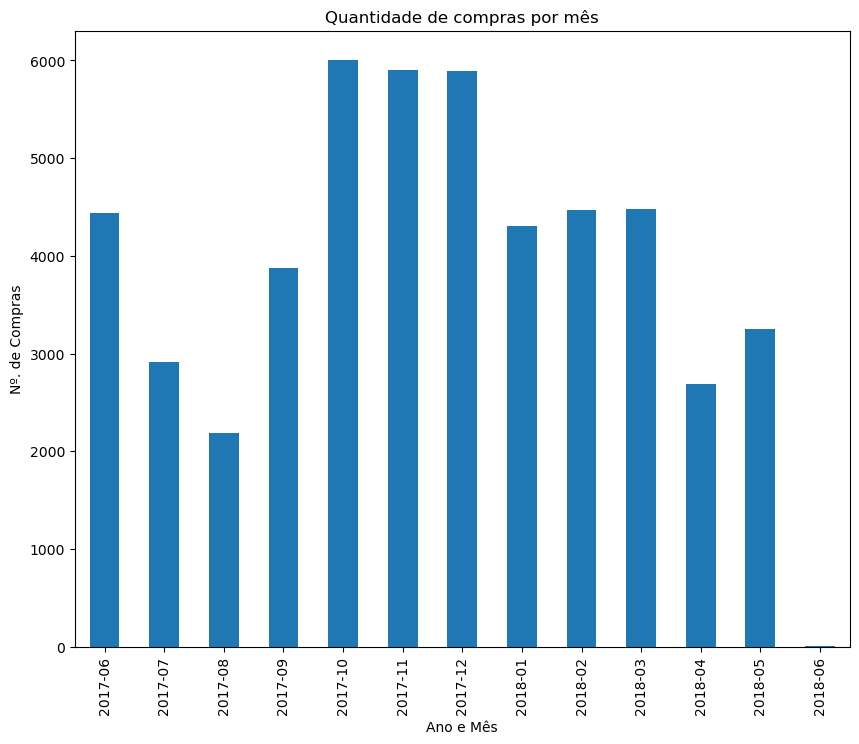

In [108]:
# Compras por mês

plt.figure(figsize=(10,8))
plt.title('Quantidade de compras por mês')
orders.groupby('first_sale_month')['revenue'].count().plot(kind='bar')
plt.ylabel('Nº. de Compras')
plt.xlabel('Ano e Mês')
plt.show();

Como se espera de uma empresa de varejo o último trimestre do ano é o que possui o maior volume de compras.

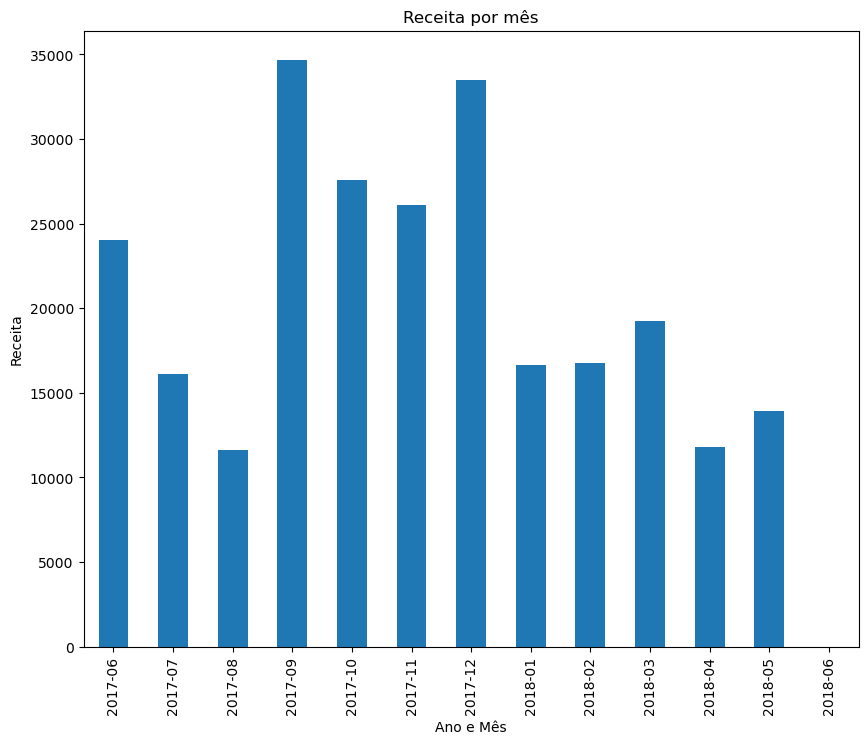

In [109]:
#Receita mensal

plt.figure(figsize=(10,8))
plt.title('Receita por mês')
orders.groupby('first_sale_month')['revenue'].sum().plot(kind='bar')
plt.ylabel('Receita')
plt.xlabel('Ano e Mês')
plt.show();


O gráfico de barras demonstra o que já se é esperado por uma empresa do setor de varejo, uma receita cíclica e instável devido sua sensíbilidade ao mercado de crédito. Pois bem, em um primeiro momento vemos que os padrões são realmente desse setor, quando observamos o mês de dezembro vemos um crescimento na receita, mesmo que não utrapasse o rendimento do mês de Setembro. Mas logo em seguinda em Janeiro do meÊs subsequente há uma queda brusca na receita. 

Se observarmos o período dos 4º tri, a receita estão elevadas em relação aos outros trimestres e seguindo um padrão mais 'uniforme'.

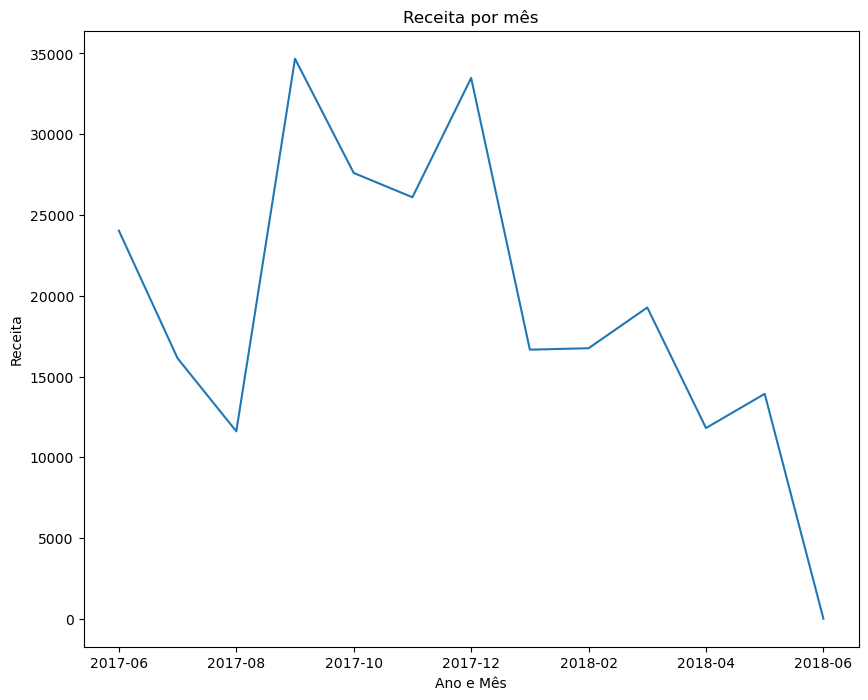

In [110]:
#Gráfico de receita mensal

plt.figure(figsize=(10,8))
plt.title('Receita por mês')
orders.groupby('first_sale_month')['revenue'].sum().plot()
plt.ylabel('Receita')
plt.xlabel('Ano e Mês')
plt.show();


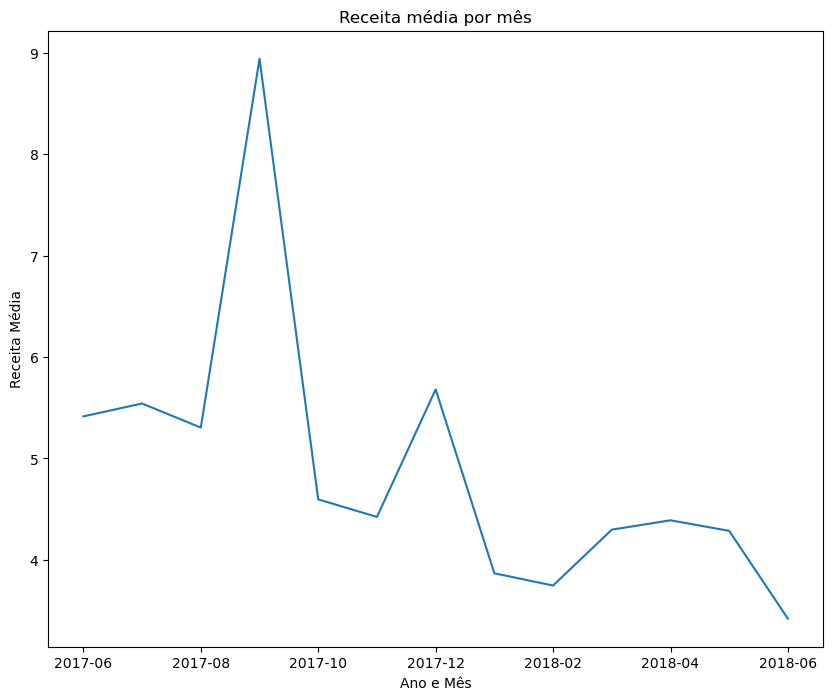

In [111]:
#Gráfico de receita média mensal

plt.figure(figsize=(10,8))
plt.title('Receita média por mês')
orders.groupby('first_sale_month')['revenue'].mean().plot()
plt.ylabel('Receita Média')
plt.xlabel('Ano e Mês')
plt.show();


A Receita parece não se comportar muito bem, apenas observando pelo financeiro, percebe-se que ela está em uma aparente queda livre. 

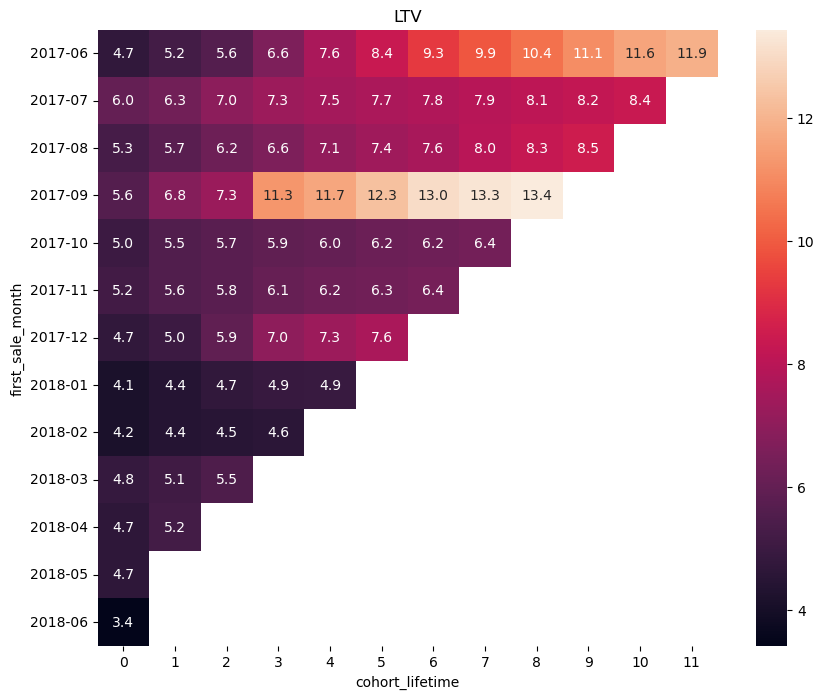

In [112]:
# Cohort LTV

group_cohort = orders.groupby(['first_sale_month', 'cohort_lifetime']).agg({'revenue':'sum'})
group_cohort = group_cohort.reset_index()

cohort_grouping = orders.groupby('first_sale_month').agg({'uid':'nunique'}).reset_index()
cohort_grouping.columns = ['first_sale_month', 'n_buyers']

group_cohort = group_cohort.merge(cohort_grouping, on='first_sale_month', how='left')

cohort_grouping = orders.groupby('first_sale_month').agg({'uid':'nunique'}).reset_index()
cohort_grouping.columns = ['first_sale_month', 'n_buyers']


group_cohort['revenue_per_user'] = group_cohort['revenue'] / group_cohort['n_buyers']
group_cohort_pivot = group_cohort.pivot_table(index='first_sale_month',
                                              columns='cohort_lifetime',
                                              values='revenue_per_user',
                                              aggfunc='mean')



report= group_cohort.groupby(['first_sale_month', 'cohort_lifetime']).agg({'n_buyers': 'sum', 'revenue_per_user':'sum' }).reset_index()

report = report.pivot_table(index='first_sale_month',
                 columns='cohort_lifetime',
                 values='revenue_per_user',
                 aggfunc='mean').cumsum(axis=1)

plt.figure(figsize=(10,8))
plt.title("LTV")

sns.heatmap(
    data = report,
    annot=True,
    fmt='.1f',      
    linecolor='gray',
)

plt.show()



Como observado nos gráficos passados vemos um decaimento na receita com o passar dos meses. Ainda é cedo para tecer algum comentário mais profundo, pois ainda não foi feita a análise de gastos de marketing para que possamos ter a métrica CAC. que nos dá uma noção dos custos da aquisição de clientes.

## 3.3. Análise de Marketing

Aqui será análisado os custos de Marketing e o quanto cada veículo utilizado gera de receita e quais são os mais rentáveis e os que não possuem um bom aproveitamento em relação **custo/receita gerada**

In [113]:
#Gastos Totais

print(f'Os custos totais com Marketing é de: ${costs.costs.sum()}')



Os custos totais com Marketing é de: $329131.62


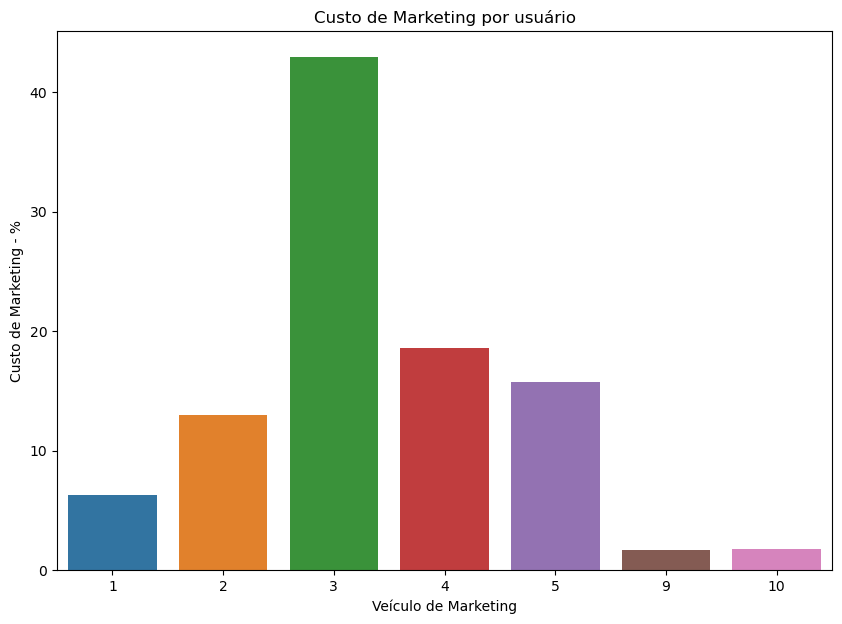

In [114]:
# Custo de Marketing por usuário

cost_source = costs.groupby('source_id')['costs'].sum().reset_index()
visit_source = visits.groupby('source_id').agg({'uid':'nunique'})
cost_per_visit = pd.merge(cost_source, visit_source, on= 'source_id' )
cost_per_visit['cost_per_id'] = cost_per_visit['costs'] / cost_per_visit['uid']
cost_per_visit['percentage'] = (cost_per_visit.costs / cost_per_visit.costs.sum()) * 100

#Plotando Gráfico 

plt.figure(figsize=(10, 7))
plt.title('Custo de Marketing por usuário')
sns.barplot(data=cost_per_visit, y='percentage', x='source_id')
plt.xlabel('Veículo de Marketing')
plt.ylabel('Custo de Marketing - %')
plt.show();



Observa-se no gráfico acima que a plataforma que recebe mais investimento por parte do Marketing é a plataforma 3 recebendo aproximadamente 43% do investimento total.

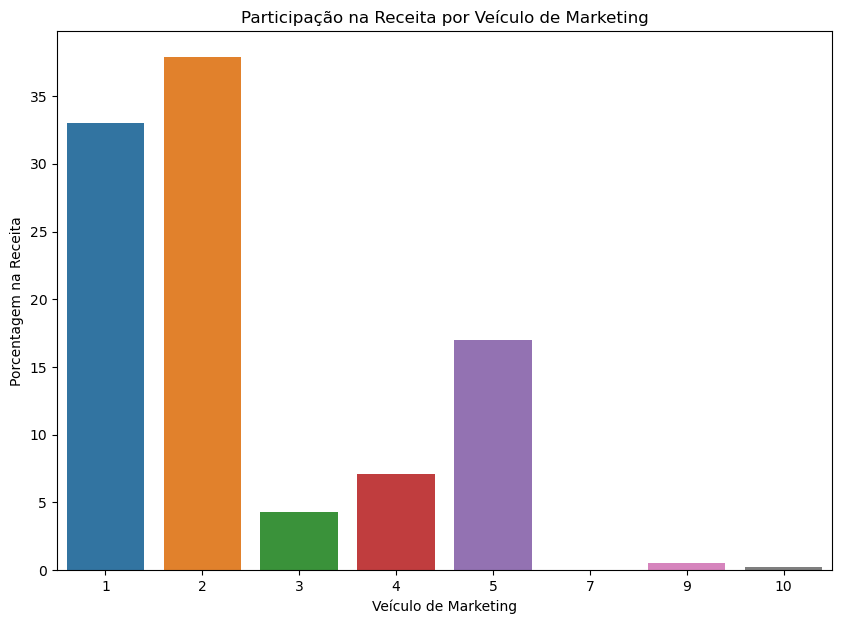

In [115]:
# Participação na Receita por Veículo de Marketing

order_source = orders.merge(visits, on='uid')
order_source_sum = order_source.groupby('source_id')['uid'].count().reset_index()
order_source.groupby('source_id').agg({'uid': 'nunique'})
order_source_nun = order_source.groupby('source_id').agg({'uid': 'nunique', 'revenue':'sum'}).reset_index()
order_source_nun['rev_uid'] = order_source_nun.revenue / order_source_nun.uid
order_source_nun['percentage'] = (order_source_nun.revenue / order_source_nun.revenue.sum()) * 100

#Plotando Gráfico

plt.figure(figsize=(10, 7))
plt.title('Participação na Receita por Veículo de Marketing')
sns.barplot(data=order_source_nun, y='percentage', x='source_id')
plt.xlabel('Veículo de Marketing')
plt.ylabel('Porcentagem na Receita')
plt.show();

Bem, mesmo a plataforma 3 recebendo o maior investimento não é a mais lucrativa, gerando apenas 4% da receita total. Enquanto a plataforma 1 e 2 que receberam juntas menos de 20% do investimento total geraram aproximadamente 70% da receita total das vendas.

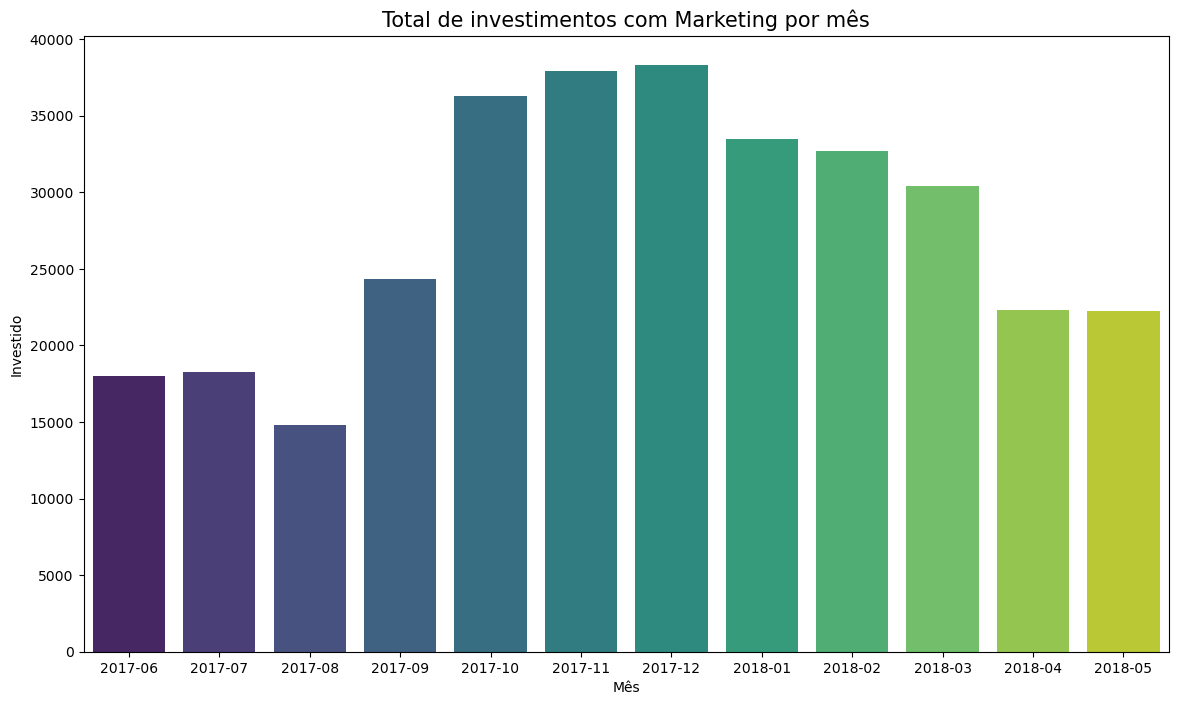

In [116]:
# Custo por Mês

costs_per_month = costs.groupby('month').agg({'costs':'sum'}).reset_index()
costs_per_month['month'] = pd.to_datetime(costs_per_month['month'])
costs_per_month['percentage'] = (costs_per_month['costs'] / (costs['costs'].sum())) * 100
costs_per_month['month'] = costs_per_month['month'].dt.strftime('%Y-%m') 

#Plotando Gráfico

plt.figure(figsize=(14, 8))
sns.barplot(data=costs_per_month, x='month', y='costs', palette='viridis')
plt.title('Total de investimentos com Marketing por mês', fontsize=15)
plt.xlabel('Mês')
plt.ylabel('Investido')
plt.show()

Pode-se observar que nos últimos 3 meses do ano, Outubro, Novemro e Dezembro, a campanha de Marketing foram mais agressivas e receberam um investimento bem robusto em comparação aos outros períodos do ano. 

In [117]:
report_2 = pd.merge(group_cohort, costs_per_month[['month', 'costs']], left_on='first_sale_month', right_on='month')
report_2['cac'] = report_2['costs'] / report_2['n_buyers']


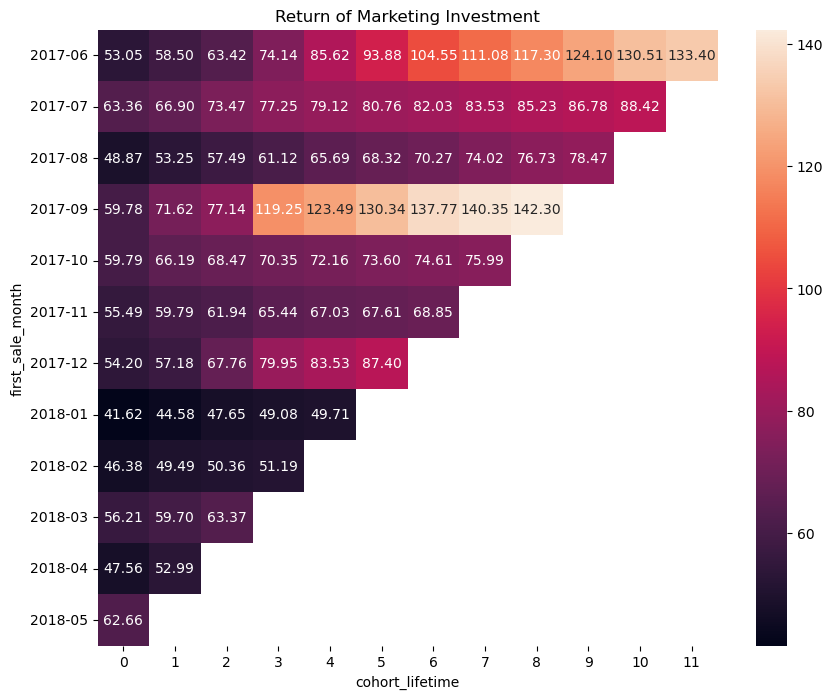

In [118]:
#Romi

report_2 = pd.merge(group_cohort, costs_per_month[['month', 'costs']], left_on='first_sale_month', right_on='month')
report_2['cac'] = report_2['costs'] / report_2['n_buyers']
report_2['romi'] = (report_2['revenue_per_user'] / report_2['cac']) * 100
romi_pivot = report_2.pivot_table(index='first_sale_month',
                                  columns='cohort_lifetime',
                                  values='romi',
                                  aggfunc='mean'
)
romi_pivot = romi_pivot.cumsum(axis=1).round(2)


# Plotando Gráfico
plt.figure(figsize=(10, 8))
plt.title('Return of Marketing Investment')
romi_heatmap = sns.heatmap(
    romi_pivot,
    annot=True,
    fmt='.2f',
 ) 

O meses de Junho e Setembro, apresentaram bons números onde a receita superou os custos de marketing. Houve uma explosão de vendas nesses períodos. Porém, os outros períodos não apresentaram lucratividade. 

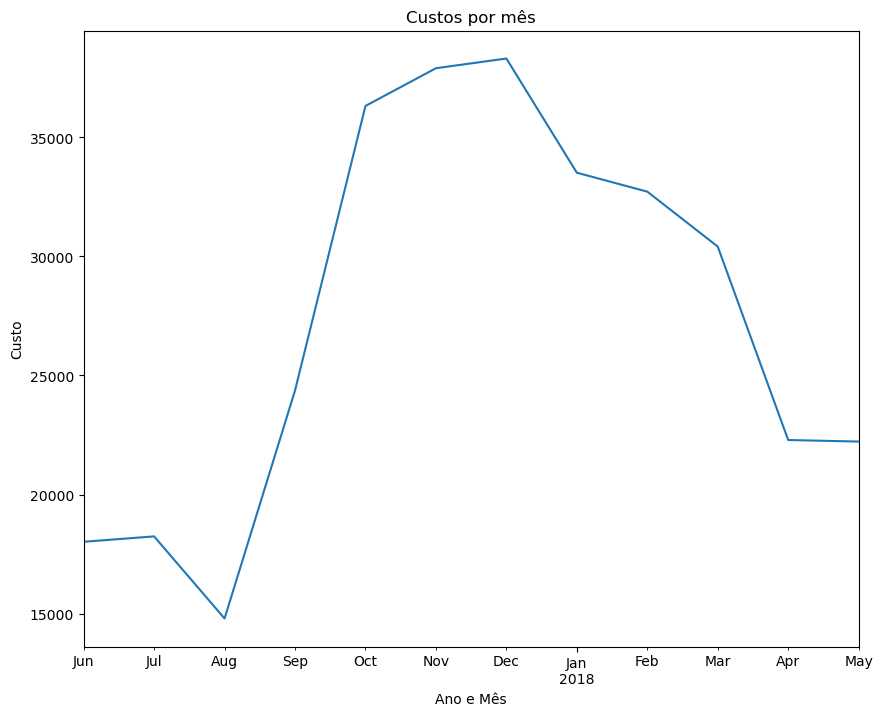

In [119]:
# custo mensal em gráfico de linha

plt.figure(figsize=(10,8))
plt.title('Custos por mês')
costs.groupby('month')['costs'].sum().plot();

plt.ylabel('Custo')
plt.xlabel('Ano e Mês')
plt.show();

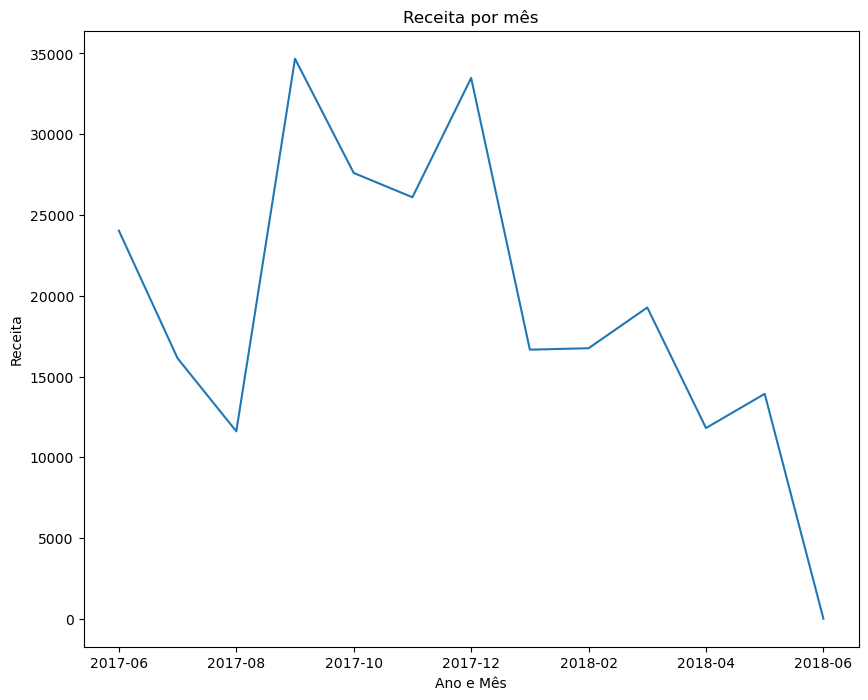

In [120]:
# Receita mensal em gráfico de linha

plt.figure(figsize=(10,8))
plt.title('Receita por mês')
orders.groupby('first_sale_month')['revenue'].sum().plot()

plt.ylabel('Receita')
plt.xlabel('Ano e Mês')
plt.show();

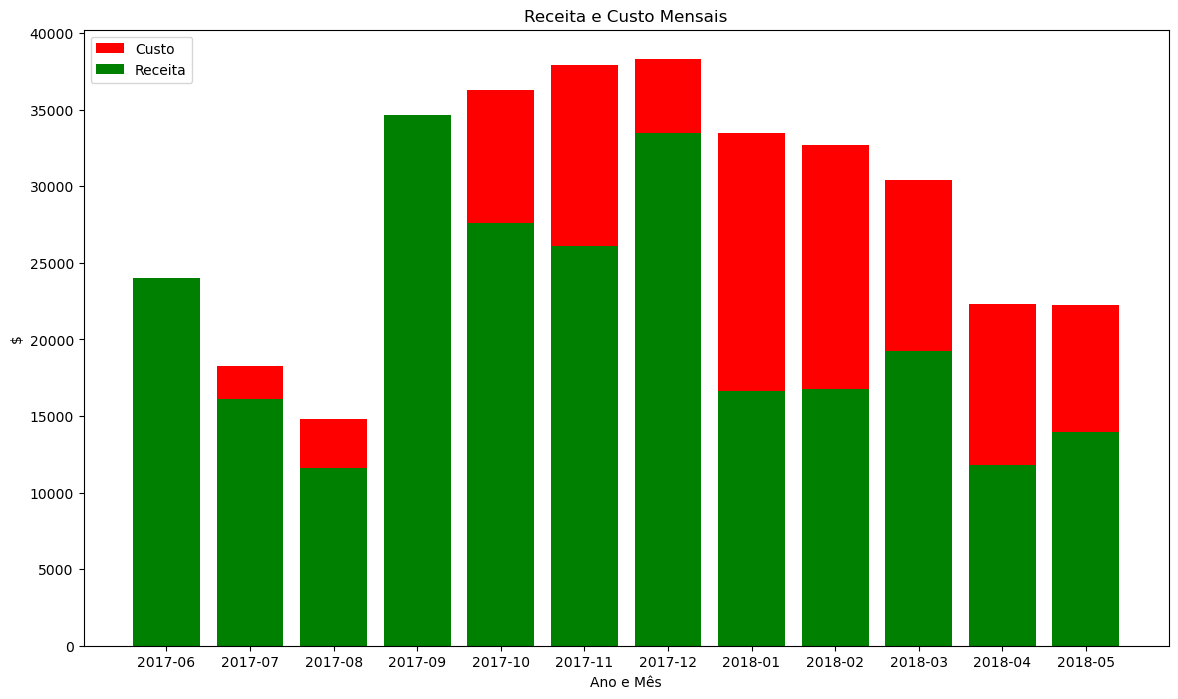

In [121]:
ord_merge = orders.groupby('first_sale_month')['revenue'].sum().reset_index()
ord_merge.columns = ['month', 'revenue']
ct_merge = costs.groupby('month')['costs'].sum().reset_index()
ct_merge['month'] = ct_merge['month'].dt.strftime('%Y-%m') 
cost_rev = ct_merge.merge(ord_merge, on='month')
cost_rev.groupby('month')[['revenue', 'costs']]

#Uma visão mais clara de quanto a despesa supera a receita.

x = cost_rev.month
y = cost_rev.costs
y2= cost_rev.revenue

fig, ax = plt.subplots(figsize=(14, 8))
plt.title('Receita e Custo Mensais')
plt.ylabel('$')
plt.xlabel('Ano e Mês')

ax.bar(x, y, color='red', label='Custo')
ax.bar(x, y2, color='green', label='Receita')
ax.legend(loc = 'upper left')
plt.show()


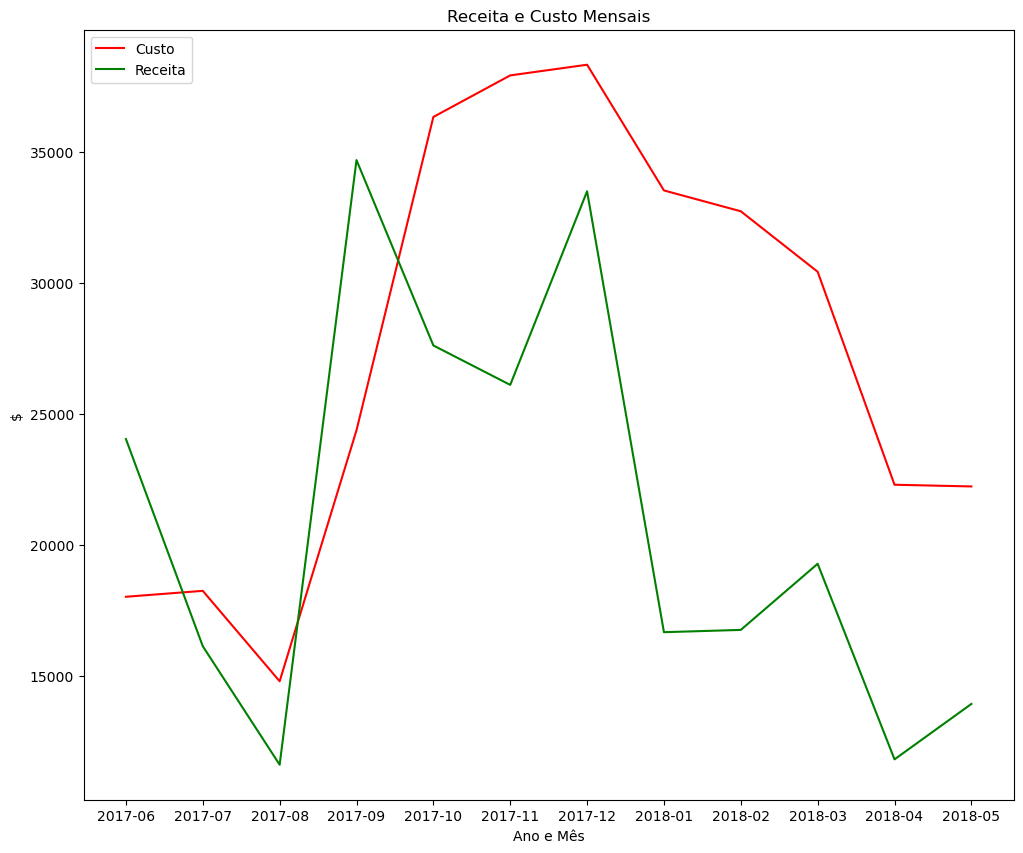

In [122]:
x = cost_rev.month
y = cost_rev.costs
y2= cost_rev.revenue

fig, ax = plt.subplots(figsize=(12, 10))
plt.title('Receita e Custo Mensais')
plt.ylabel('$')
plt.xlabel('Ano e Mês')

ax.plot(x, y, color='red', label='Custo')
ax.plot(x, y2, color='green', label='Receita')
ax.legend(loc = 'upper left')
plt.show()

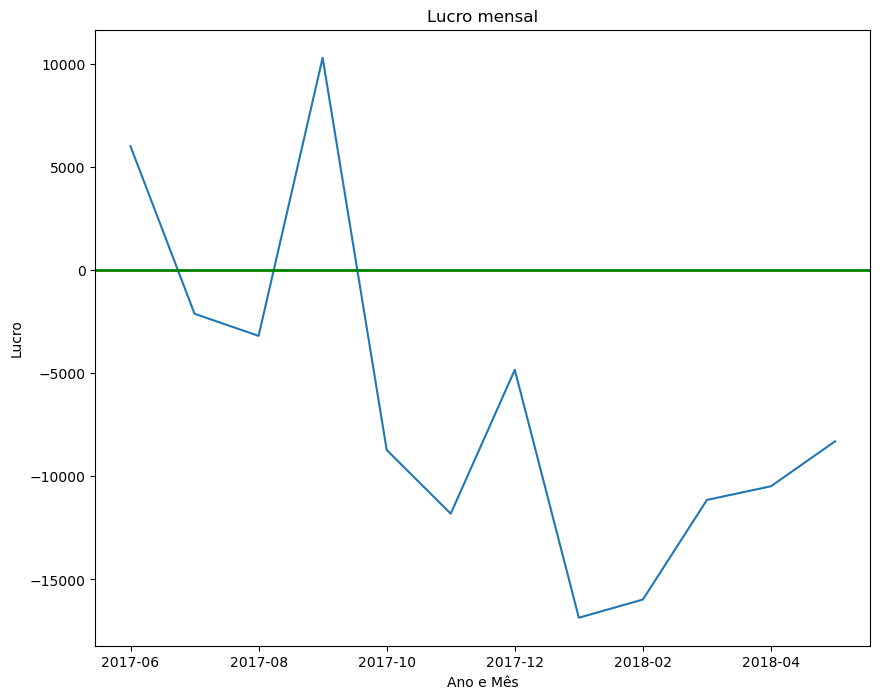

In [123]:
# Lucro mensal em gráfico de linha

cost_rev['profit'] = cost_rev['revenue'] - cost_rev['costs']
plt.figure(figsize=(10,8))
plt.title('Lucro mensal')
cost_rev.groupby('month')['profit'].sum().plot()
plt.axhline(y=0, color= 'green', linewidth=2,)

plt.ylabel('Lucro')
plt.xlabel('Ano e Mês')
plt.show();

In [124]:
print(f'O total de lucro líquido da empresa é de: ${round(orders.revenue.sum() - costs.costs.sum(), 2)}')
print(f'Que corresponde mensalmente a: ${round((orders.revenue.sum() - costs.costs.sum()) / 12, 2)} a.m..')

O total de lucro líquido da empresa é de: $-77074.42
Que corresponde mensalmente a: $-6422.87 a.m..


Como pode se observar com a comparação gráfica Receita x Custos, este último é superior a receita gerada, ou seja, o modelo de negócio não foi lucrativo no período analisado. 

O crescimento dos custos aumentam junto com o aumento da Receita o que mostra que sua correlação é positiva, porém, a queda dos custos é mais atenuada que a da receita e tende a se manter em níveis mais altos. Enquanto a receita cai de forma mais brusca.

O prejuízo gerado em um período de 12 meses pelo atual modelo de negócio é de, aproximadamente, $-77.075,00.

# Conclusão

Inicialmente, deve-se frisar que os investimentos nos veículos de Marketing estão sendo direcionados para os veículos menos lucrativos, como por exemplo o veículo 3, que é uma das veículos menos lucrativas apresentando apenas 4,26% da receita enquanto é investido cerca de 43% do capital destinado ao Marketing. 

Com menos de 20% do capital destinado ao investimento em Marketing as veículos 1 e 2 geram juntas mais de 70% da receita. 

Somente estes números já nos diz que deve-se dar mais atenção a esses veículos que geram mais receita e cogitar zerar o investimento nos outros veículos, ou realocá-los, ou talvez, investir uma quantidade eventual em momentos pontuais como o último trimestre do ano que é o período que o número de vendas dispara, superando e muito os outros meses como foi mostrado gráficamente. 

Portanto, é aconselhado que reveja a politica de investimento em Marketing dos veículos 3 e 4, o mais rápido possível.  

Pois diante do atual cenário de um prejuízo de $-77074.42 em um período de 12 meses, tal prejuízo pode ser irreversível.